#**Time Series Analysis of ITC: Live Stock Analysis using ARIMA**

###**Introduction:**

ITC Pvt Ltd. was incorporated on August 24, 1910 under the name Imperial Tobacco Company of India Limited. As the Company's ownership progressively Indianised, the name of the Company was changed to India Tobacco Company Limited in 1970 and then to I.T.C. Limited in 1974

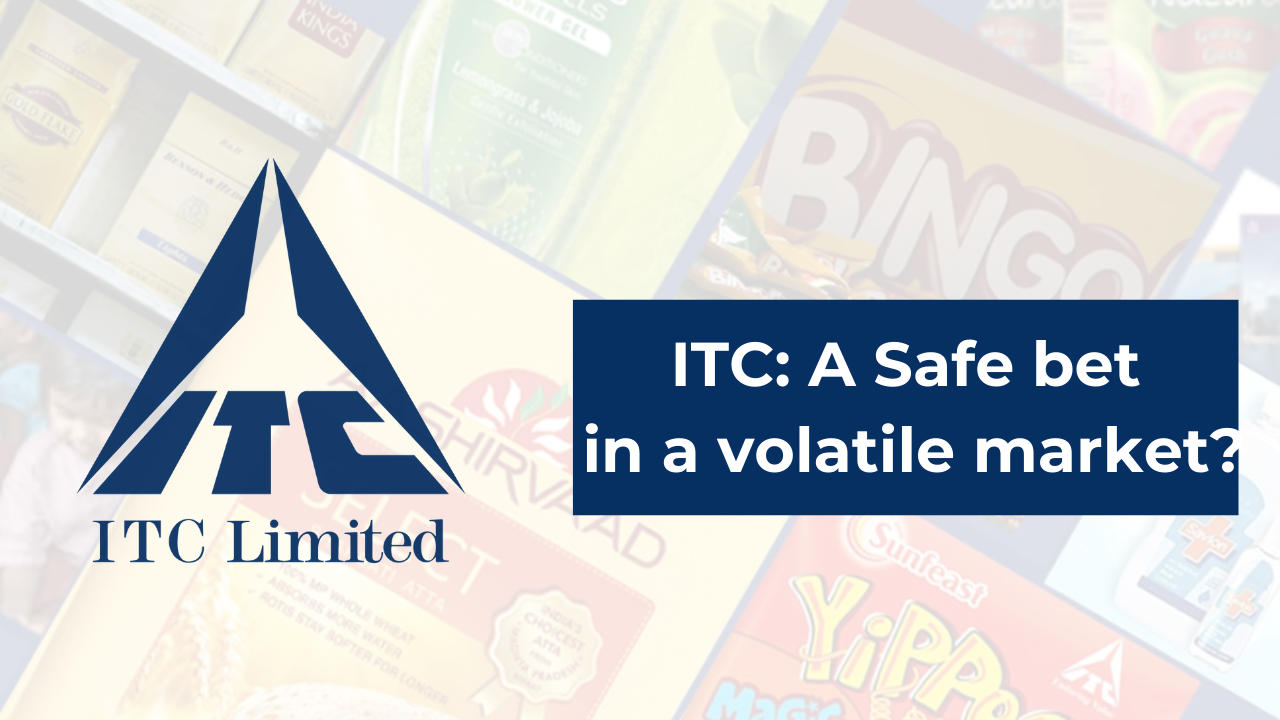

Here In time series modelling,wew are trying to analyze the stock using the ARIMA models are used which are one of the greatest choices. Performing optimal time series modelling using the ARIMA models required various efforts and one of the major efforts was in finding the value of its parameters. This model includes three-parameter p, d and q.

ARIMA models combine two models and 1 method. Two models are  **Auto Regression(AR) and Moving Average(MA)**. One method is **differencing(I)**. These three works together when the time series we use is non-stationary. In simple words, we can call a model ARIMA model if we apply differencing (I) at least once to make the data stationary and combine autoregressive and moving averages to make some forecasting based on old time-series data

**Some Assumptions of ARIMA Model**


*   Is there known seasonality (cyclical trends)?
*   Are there a lot of outliers or sporadic data points?
*   Is the variation of the data about the mean inconsistent?




**If you answered no to these questions, then the ARIMA model is for you!**

**1.1 Import the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


**1.2. Fetch the dataset from Yahoo Finance**

In [ ]:
ticker = 'ITC.NS'
df = yf.download(ticker, start='2020-05-01', end='2023-05-01', rounding= True)

[*********************100%%**********************]  1 of 1 completed


**1.3. Capturing Live data**

In [ ]:
df.to_csv("ITC_stock_datset")

**1.4. Fetching the data**

In [ ]:
df = pd.read_csv('ITC_stock_datset', index_col='Date', parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,181.75,181.75,170.65,174.05,144.89,30294317
2020-05-05,175.00,177.45,172.00,173.90,144.76,17707577
2020-05-06,171.40,171.40,160.50,163.90,136.44,65586734
2020-05-07,164.00,165.85,160.50,161.00,134.02,24249585
2020-05-08,163.95,164.15,157.10,158.25,131.73,25307015


**1.5. Fetching the data Info**

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(745, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2020-05-04 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       745 non-null    float64
 1   High       745 non-null    float64
 2   Low        745 non-null    float64
 3   Close      745 non-null    float64
 4   Adj Close  745 non-null    float64
 5   Volume     745 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.7 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,745.000000,745.000000,745.000000,745.000000,745.000000,7.450000e+02
mean,250.122819,252.729664,247.416711,250.033893,232.227154,2.309848e+07
std,64.123770,64.601148,63.810305,64.445414,69.483739,1.719615e+07
min,158.450000,163.500000,157.100000,158.250000,131.730000,3.170564e+06
25%,205.000000,206.850000,202.950000,204.950000,184.120000,1.183404e+07
50%,221.000000,223.650000,218.650000,221.500000,203.290000,1.846853e+07
75%,301.000000,303.750000,300.450000,302.450000,291.650000,2.711680e+07
max,418.000000,428.250000,413.700000,425.550000,416.820000,1.492389e+08


**1.6. Understanding the Moving Average over a period**

*   Moving average of 30 Days.
*   Moving average of 90 Days.






**1.7. Data Visualization**

In [ ]:
df['MA_30'] = df['Adj Close'].rolling(window=30).mean()
df['MA_90'] = df['Adj Close'].rolling(window=90).mean()

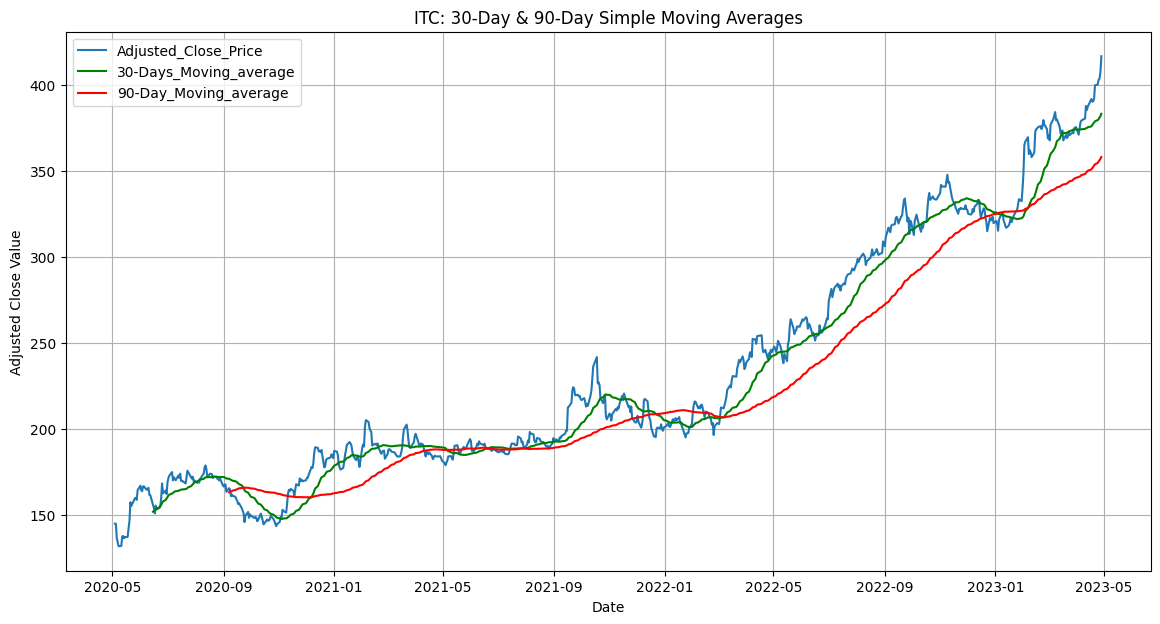

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Adjusted_Close_Price')
plt.plot(df.index, df['MA_30'], label='30-Days_Moving_average', color='green')
plt.plot(df.index, df['MA_90'], label='90-Day_Moving_average', color='red')
plt.title('ITC: 30-Day & 90-Day Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Value')
plt.legend()
plt.grid(True)
plt.show()

**1.8. Check the stationarity using Augmented Dickey-Fuller test**

In words, we can explain this expression as,

Prediction = constant + linear combination lags of Y + linear combination of lagged forecast errors



*  **AR — Auto-regression: Terms created based on past data points**
*  **I — Integration/differencing: Accounting for overall “trend” in the data**
*  **MA — Moving average: Terms of error or noise based on past data points**





In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.4046410494292094
p-value: 0.9971351237944277


To make a better explanation of ARIMA we can also write it as (AR, I, MA) and by this, we can assume that in the ARIMA, p is AR, d is I and q is MA.  here our assumption is right. These parameters can be explained as follows.


*   **AR** = Uses past values to predict the future.
*   **I**= Uses the differencing of observation and makes the stationary data.
*   **MA** = Uses past error terms in the given series to predict the future.




**Where the order represents as follows**


**p**= log order/ No of lag observations.

**d**= degree of differencing/ No of times that the raw observations are differenced.

**q**= order of moving average/the size of the moving average window





In [ ]:
print(result)

(1.4046410494292094, 0.9971351237944277, 0, 744, {'1%': -3.4391698996357687, '5%': -2.8654325580580204, '10%': -2.568842816582842}, 3813.0244662984514)


**1.9. To make the data stationary**

In [ ]:
df['Adj Close'].diff()


Date
2020-05-04     NaN
2020-05-05   -0.13
2020-05-06   -8.32
2020-05-07   -2.42
2020-05-08   -2.29
              ... 
2023-04-24    0.44
2023-04-25    2.79
2023-04-26    0.69
2023-04-27    3.67
2023-04-28    9.35
Name: Adj Close, Length: 745, dtype: float64

**There is 1 null value, Hence this need to be removed**

In [ ]:
deltaClose= df['Adj Close'].diff().dropna()

In [ ]:
print(adfuller(deltaClose))

(-26.160222330712575, 0.0, 0, 743, {'1%': -3.439181811684251, '5%': -2.865437807603377, '10%': -2.5688456132154935}, 3810.682641797177)


In [ ]:
# Interpretation

if deltaClose[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

The time series is stationary.


**Since it has become stationary,Hence can now Reject the Null Hypothesis**

**Plot: now the data is stationed**

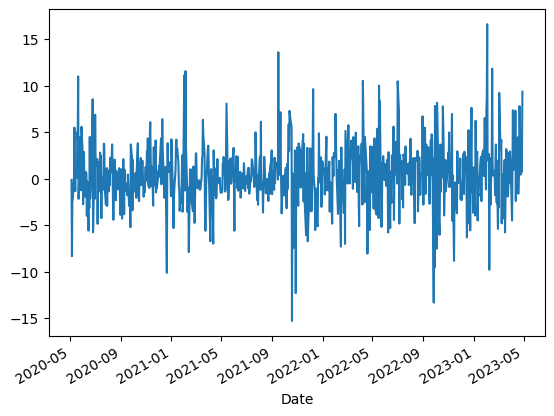

In [ ]:
deltaClose.plot();

**1.10. Determine the P,D,Q Values**


Test for stationarity using the augmented dickey fuller test.

1. If the time series is stationary try to fit the ARMA model, and if the time series is non-stationary then seek the value of d.
2. If the data is getting stationary then draw the autocorrelation and partial autocorrelation graph of the data.
3. Draw a partial autocorrelation graph(ACF) of the data. This will help us in finding the value of p because the cut-off point to the PACF is p.
4. Draw an autocorrelation graph(ACF) of the data. This will help us in finding the value of q because the cut-off point to the ACF is q.

The partial autocorrelation function plot can be used to draw a correlation between the time series and its lag while the contribution from intermediate lags can be ignored. This plotting will let us know about the lags that are not required in the autoregression part.

Significant correlation in a stationary time series can be represented by adding auto regression terms. Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit

To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.







**Plot: P**

**Auto-Correlation Function (ACF)**


ACF indicates how similar a value is within a given time series and the previous value. (OR) It measures the degree of the similarity between a given time series and the lagged version of that time series at the various intervals we observed.

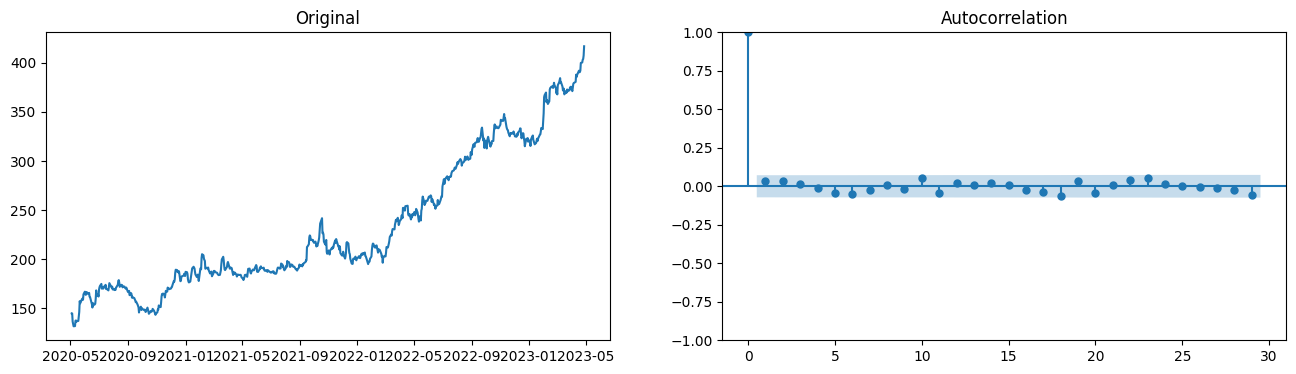

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig,(ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(df['Adj Close'])
ax1.set_title('Original')
plot_acf(deltaClose, ax= ax2);


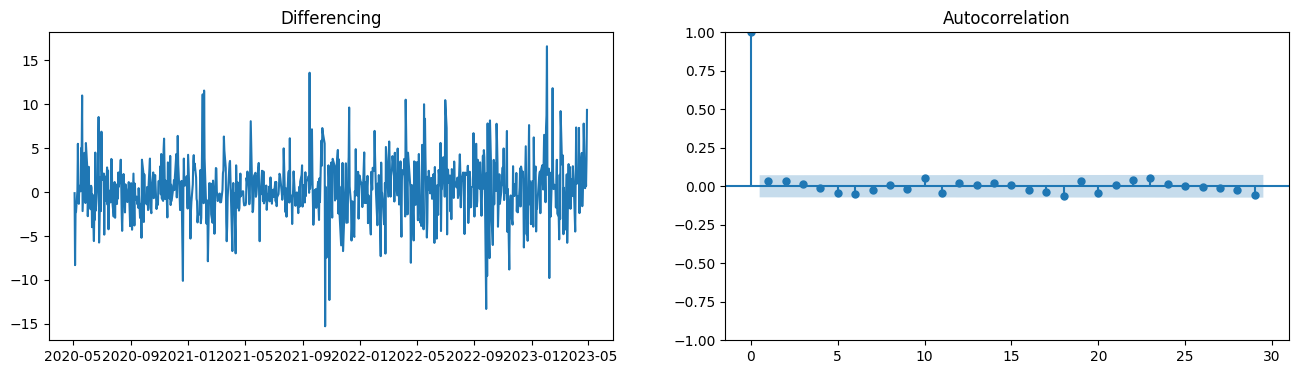

In [ ]:


fig,(ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(deltaClose)
ax1.set_title('Differencing')
plot_acf(deltaClose, ax= ax2);

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**1.11. Use pmdarima package to get the number of differencing Checked**

In [ ]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(df['Close'],test='adf')

1

**Plot: Q**

**Partial Auto-Correlation (PACF)**


PACF is similar to Auto-Correlation Function and is a little challenging to understand. It always shows the correlation of the sequence with itself with some number of time units per sequence order in which only the direct effect has been shown, and all other intermediary effects are removed from the given time series

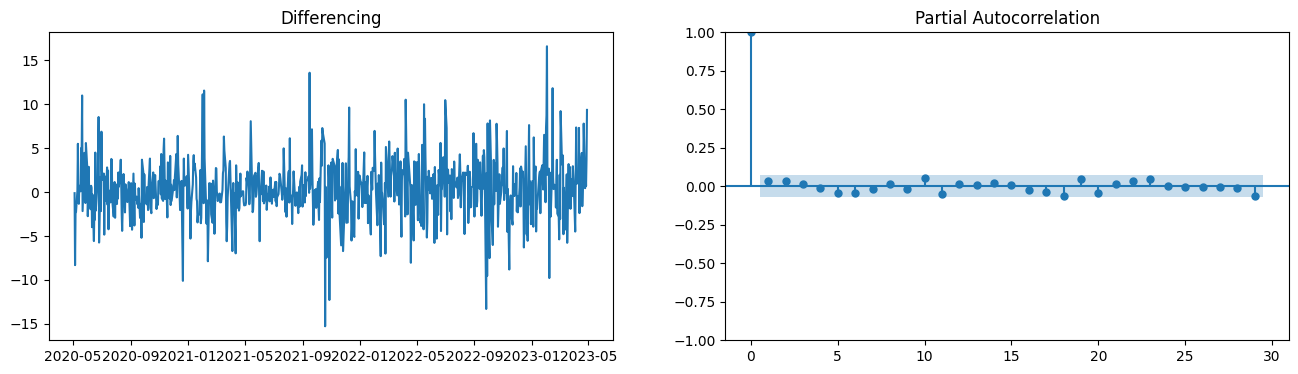

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig,(ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(deltaClose)
ax1.set_title('Differencing')
ax2.set_ylim(0,1)
plot_pacf(deltaClose, ax= ax2);

**1.12. Fit ARIMA Model**



In [ ]:
# Define the values of p, d, and q
p = 1  # Autoregressive (AR)
d = 1  # Integration (I) order (level of differencing)
q = 0  # Moving Average

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.Close, order=(p, d, q))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  745
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2036.110
Date:                Fri, 31 May 2024   AIC                           4076.220
Time:                        11:40:44   BIC                           4085.444
Sample:                             0   HQIC                          4079.776
                                - 745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0418      0.034      1.223      0.221      -0.025       0.109
sigma2        13.9507      0.488     28.595      0.000      12.995      14.907
Ljung-Box (L1) (Q):                   0.06   Jarque-

**MA Model**


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df['Adj Close'], result.predict())

0.08951212796182323

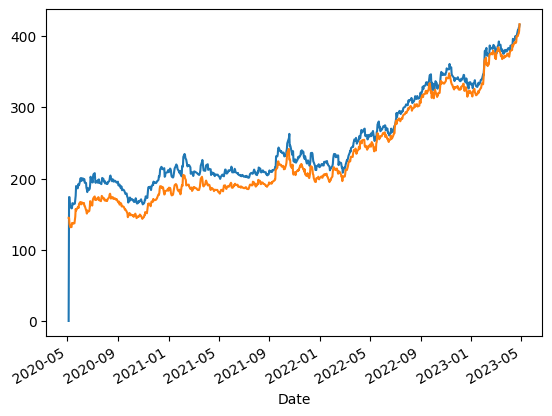

In [ ]:
result.predict().plot()
df['Adj Close'].plot();

**Hence we can see that the values are pretty close to the real values. also the error is below 1 %, This can be considered as a good model**

**Auto ARIMA**

In [ ]:
import pmdarima as pm

auto_model= pm.auto_arima(y=df['Adj Close'], start_p=1, start_q=0,
                          max_p=5, max_q=5,max_d=2,
                          trace= True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3931.727, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3930.629, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3931.787, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3937.243, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3933.147, Time=0.36 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.642 seconds


**Findings: Using Auto ARIMA, we can see that model(1,1,0) provides the optimal result, Hence this can be used to predict the Price of shares**

In [ ]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  745
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1963.314
Date:                Fri, 31 May 2024   AIC                           3930.629
Time:                        11:41:19   BIC                           3939.853
Sample:                             0   HQIC                          3934.184
                                - 745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3655      0.125      2.935      0.003       0.121       0.610
sigma2        11.4713      0.397     28.880      0.000      10.693      12.250
Ljung-Box (L1) (Q):                   0.90   Jarque-

**Conclusion**

The ARIMA model is recursive in nature and thus relies on past calculations. This recursive nature comes directly from the AR and MA equation terms that are added to the model.

The p value, or AR part, essentially describes how reliant your data points are on past data points. If p=1 then the model’s output for a specific time relies directly on what the output was for the time before. If p=2, then the output would rely on the outputs from the last two time periods.

Similarly, the q value, or MA part, uses the same recursive concept. The difference is that q describes how related your current output is to its past error or noise calculations. So, if q=1, then your current output would rely on the past time period’s noise calculation. For q=2, your output would rely on the noise from the last two time periods.